In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cv2
import scipy.ndimage
import numpy as np
from matplotlib import pyplot as plt
import glob
import math

import sys
sys.path.append('../scripts')
import util
import ip_routines as ip

cols = 1232
rows = 1018

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from random import randint
circle_coords = [(randint(cols/2-20, cols/2+20), randint(rows/2-20, rows/2+20), randint(200, 250) ) for i in range(0,9)]
print(circle_coords)

[(629, 509, 227), (632, 518, 245), (626, 523, 242), (621, 500, 219), (610, 517, 233), (622, 499, 209), (610, 509, 248), (625, 509, 236), (601, 497, 204)]


[[848 509]
 [781 671]
 [390 509]
 [457 671]
 [457 346]
 [781 346]]


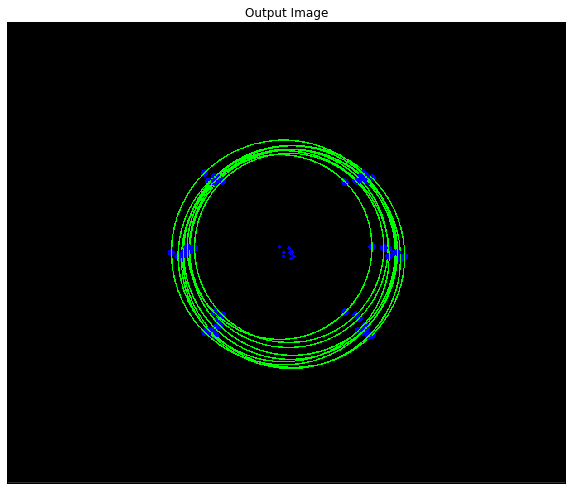

In [6]:
debug_img = np.zeros((rows, cols, 3), np.uint8)

pt_clusters=[ []  for x in range(7) ]
pt_averages=[ ]

# loop over the (x, y) coordinates and radius of the circles
for (x, y, r) in circle_coords:
    #print "Center: ", (x,y), " Radius: ", r
    pts = ip.findPtsOnCircle((x, y), r)
    pts = np.uint16(np.around(pts, 0))
    #print pts
    pt_clusters[0].append( (x,y) )
    for idx, pt in enumerate(pts):
        cv2.circle(debug_img, (pt[0], pt[1]), 5, (0,0,255),5)
        pt_clusters[idx+1].append( (pt[0], pt[1]) )

    # draw the outer circle
    cv2.circle(debug_img, (x, y), r, (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(debug_img, (x, y), 2, (0,0,255),3)
    
#print pt_clusters
#print "  >>> len(pt_clusters) = ", len(pt_clusters)
for pt_cluster in pt_clusters:
    #print "    >>> len(pt_cluster) = ", len(pt_cluster)
    pt_averages.append(ip.findAvePt(pt_cluster))
#pt_averages = np.uint16(np.around(pt_averages, 0))
#print(pt_averages)
ellipse_fit_pts = np.array(pt_averages[1:], dtype=np.int32) 
print(ellipse_fit_pts)
ellipse = cv2.fitEllipse(ellipse_fit_pts) 

util.plot_imgs([(debug_img, 'Output Image')], color=True)